Установка и импорт библиотек

In [1]:
%pip install -r requirements.txt

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ce/cd/a7c2cbffe2afff975349e60b14b63a448162145a7acac8ba12ddc2ed78a8/pandas-2.1.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/cc/05/ef9fc04adda45d537619ea956bc33489f50a46badc949c4280d8309185ec/numpy-1.26.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.1 kB ? eta -:--:--
     ------------------------------- ------ 51.2/61.1 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 61.1/61.1 kB 540.9 kB/s eta 0:00:00
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.

In [2]:
import numpy as np
import pandas as pd
import cv2
import pywt
import matplotlib.pyplot as plt
import os
%matplotlib inline

Основные функции препроцессинга

In [70]:
# 1. Метрика для размытия
# 10.1109/ICPR.2000.903548
def measBlur(img):
    return cv2.Laplacian(img, cv2.CV_64F).var()

# 2. Метрика для освещенности
# https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color/56678483#56678483
def measLum(img): # plain input (in bgr)!
    # calculate luminance matrix
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255
    img_rgb[img_rgb <= 0.04045] = img_rgb[img_rgb <= 0.04045] / 12.92
    img_rgb[img_rgb > 0.04045] = pow(((img_rgb[img_rgb > 0.04045] + 0.055) / 1.055), 2.4)
    lum = img_rgb[:, :, 0] * 0.2126 + img_rgb[:, :, 1] * 0.7152 + img_rgb[:, :, 1] * 0.0722
    """
    # take product with sobel full operator
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sob = cv2.Sobel(img_gray, -1, 1, 1, ksize = 7) / 255 # ksize value! 7 seems fine
    wlum = lum * sob
    return np.mean(wlum[wlum > 1e-1]) # maybe apply threshold
    """
    return np.mean(lum)
# 3. Метрика для шумов
# 
def measNoise(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # haar decomposition 
    cA1, (cH1, cV1, cD1) = pywt.dwt2(img_rgb, 'haar')
    #cA2, (cH2, cV2, cD2) = pywt.dwt2(cA1, 'haar')
    #cA3, (cH3, cV3, cD3) = pywt.dwt2(cA2, 'haar')
    res = cD1.var()
    if res == 0:
        return 1e3
    else:
        return 1/res

def compositeResponse(img, thrBlur, thrLum, thrNoise):
    if (measBlur(img) > thrBlur) and (measLum(img) > thrLum) and (measNoise(img) > thrNoise):
        return 1
    else:
        return 0 

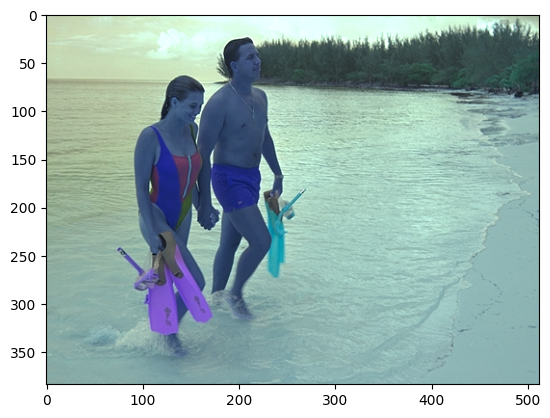

In [73]:
img = cv2.imread("./data/I12.bmp")
plt.imshow(img)

In [74]:
measNoise(img)

0.5425241219230783